In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("incl/")

import ELPH_dyn
import ELPH_utils


#global hyperparameters
kmax = 4.
n_kmax = 90

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


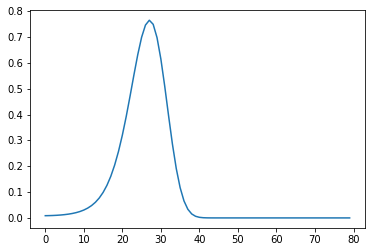

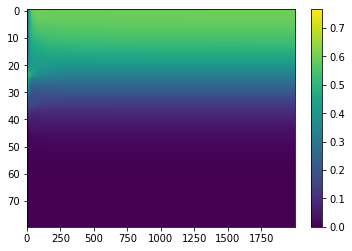

In [2]:
init = ELPH_dyn.get_init_cond_gauss(kmax = kmax, n_kmax = n_kmax, max_pos = 0.15, width = 0.05, density=0.1)
plt.plot(init[:n_kmax])
plt.show()

nkdyn = ELPH_dyn.get_el_dynamics(init, n_kmax = n_kmax)
plt.imshow(nkdyn, aspect='auto')
plt.colorbar()
plt.show()

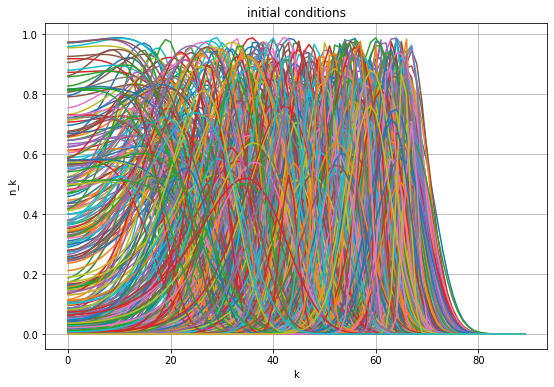

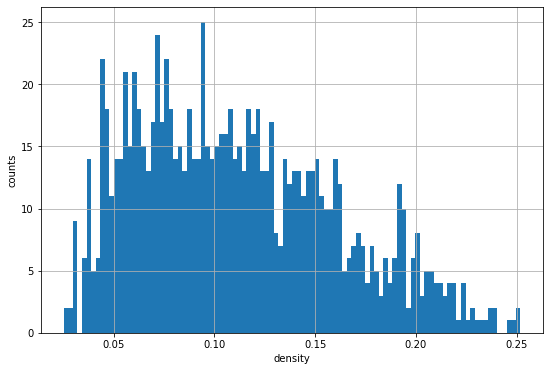

In [23]:
n_runs = 1000

rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.0, high=0.7, size=n_runs)
paras[:,1] = rng.uniform(low=0.02, high=0.1, size=n_runs)
paras[:,2] = 0.1

inits = ELPH_utils.get_gaussian_inits(kmax, n_kmax, paras)


for r in range(n_runs):
    dist_max = np.amax(inits[r][:n_kmax])
#     inits[r][:n_kmax] *= 0.95 / dist_max
    inits[r][:n_kmax] *= rng.uniform(low=0.5, high=.99) / dist_max
    paras[r,2] = ELPH_dyn.get_density_from_state(inits[r][:n_kmax], kmax/n_kmax)

    
plt.grid()
for r in range(n_runs):
    plt.plot(inits[r][:n_kmax])
plt.xlabel('k')
plt.ylabel('n_k')
plt.title('initial conditions')
plt.show()

plt.grid()
plt.hist(paras[:,2],bins=n_runs//10)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

In [24]:
runs = ELPH_utils.get_runs(kmax, n_kmax, inits, tmax=2000, n_tmax=400)

run  1  from  1000
run  2  from  1000
run  3  from  1000
run  4  from  1000
run  5  from  1000
run  6  from  1000
run  7  from  1000
run  8  from  1000
run  9  from  1000
run  10  from  1000
run  11  from  1000
run  12  from  1000
run  13  from  1000
run  14  from  1000
run  15  from  1000
run  16  from  1000
run  17  from  1000
run  18  from  1000
run  19  from  1000
run  20  from  1000
run  21  from  1000
run  22  from  1000
run  23  from  1000
run  24  from  1000
run  25  from  1000
run  26  from  1000
run  27  from  1000
run  28  from  1000
run  29  from  1000
run  30  from  1000
run  31  from  1000
run  32  from  1000
run  33  from  1000
run  34  from  1000
run  35  from  1000
run  36  from  1000
run  37  from  1000
run  38  from  1000
run  39  from  1000
run  40  from  1000
run  41  from  1000
run  42  from  1000
run  43  from  1000
run  44  from  1000
run  45  from  1000
run  46  from  1000
run  47  from  1000
run  48  from  1000
run  49  from  1000
run  50  from  1000
run  51  

run  397  from  1000
run  398  from  1000
run  399  from  1000
run  400  from  1000
run  401  from  1000
run  402  from  1000
run  403  from  1000
run  404  from  1000
run  405  from  1000
run  406  from  1000
run  407  from  1000
run  408  from  1000
run  409  from  1000
run  410  from  1000
run  411  from  1000
run  412  from  1000
run  413  from  1000
run  414  from  1000
run  415  from  1000
run  416  from  1000
run  417  from  1000
run  418  from  1000
run  419  from  1000
run  420  from  1000
run  421  from  1000
run  422  from  1000
run  423  from  1000
run  424  from  1000
run  425  from  1000
run  426  from  1000
run  427  from  1000
run  428  from  1000
run  429  from  1000
run  430  from  1000
run  431  from  1000
run  432  from  1000
run  433  from  1000
run  434  from  1000
run  435  from  1000
run  436  from  1000
run  437  from  1000
run  438  from  1000
run  439  from  1000
run  440  from  1000
run  441  from  1000
run  442  from  1000
run  443  from  1000
run  444  fro

run  788  from  1000
run  789  from  1000
run  790  from  1000
run  791  from  1000
run  792  from  1000
run  793  from  1000
run  794  from  1000
run  795  from  1000
run  796  from  1000
run  797  from  1000
run  798  from  1000
run  799  from  1000
run  800  from  1000
run  801  from  1000
run  802  from  1000
run  803  from  1000
run  804  from  1000
run  805  from  1000
run  806  from  1000
run  807  from  1000
run  808  from  1000
run  809  from  1000
run  810  from  1000
run  811  from  1000
run  812  from  1000
run  813  from  1000
run  814  from  1000
run  815  from  1000
run  816  from  1000
run  817  from  1000
run  818  from  1000
run  819  from  1000
run  820  from  1000
run  821  from  1000
run  822  from  1000
run  823  from  1000
run  824  from  1000
run  825  from  1000
run  826  from  1000
run  827  from  1000
run  828  from  1000
run  829  from  1000
run  830  from  1000
run  831  from  1000
run  832  from  1000
run  833  from  1000
run  834  from  1000
run  835  fro

In [25]:
ELPH_utils.save_runs(runs, filename='../runs_n_kmax=90')